<a href="https://colab.research.google.com/github/R329aghav/Raghavjr/blob/main/House_Data_Analysis_Using_Random_Forest_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/DATASETS/bangalore house price prediction OHE-data.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv(path)

In [ ]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.tail()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
7115,3,2.0,325.00,2900.0,3,11206.896550,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7116,3,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7117,2,1.0,48.00,880.0,2,5454.545455,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7118,2,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7119,2,1.0,78.00,1400.0,3,5571.428571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.00000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,0.032865,0.025702,0.022191,0.016292,0.016292,0.016292,0.015169,0.015169,0.014888,0.014466,0.01250,0.012219,0.012079,0.012079,0.011938,0.008567,0.007865,0.007725,0.007444,0.007444,0.007163,0.006882,0.006882,0.006601,0.006180,0.006039,0.005899,0.005899,0.005758,0.005478,...,0.003933,0.003792,0.003792,0.003792,0.003792,0.003652,0.003652,0.003652,0.003652,0.003652,0.003652,0.003652,0.003511,0.003511,0.003511,0.003511,0.003511,0.003371,0.003371,0.003371,0.003371,0.003371,0.003371,0.003230,0.003230,0.003230,0.003230,0.003090,0.003090,0.003090,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,0.178296,0.158257,0.147315,0.126605,0.126605,0.126605,0.122232,0.122232,0.121112,0.119411,0.11111,0.109870,0.109245,0.109245,0.108616,0.092169,0.088343,0.087556,0.085962,0.085962,0.084336,0.082678,0.082678,0.080984,0.078374,0.077484,0.076583,0.076583,0.075671,0.073813,...,0.062591,0.061468,0.061468,0.061468,0.061468,0.060323,0.060323,0.060323,0.060323,0.060323,0.060323,0.060323,0.059156,0.059156,0.059156,0.059156,0.059156,0.057965,0.057965,0.057965,0.057965,0.057965,0.057965,0.056748,0.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(4), int64(104)
memory usage: 5.9 MB


In [ ]:
data.shape

(7120, 108)

In [ ]:
X=data.drop(['price'],axis=1).values
y=data['price']

In [ ]:
print("X_shape-->",X.shape)
print("y_shape-->",y.shape)

X_shape--> (7120, 107)
y_shape--> (7120,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("X_train_shape-->",X_train.shape)
print("X_train_shape-->",X_train.shape)
print("y_train_shape-->",y_train.shape)
print("y_test_shape-->",y_test.shape)


X_train_shape--> (5696, 107)
X_train_shape--> (5696, 107)
y_train_shape--> (5696,)
y_test_shape--> (1424,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_100=RandomForestRegressor(n_estimators=200,criterion='mse')
regressor_100.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
regressor_100.score(X_test,y_test)

0.953385801839219

In [ ]:
predicted=regressor_100.predict(X_test)

In [ ]:
print(predicted)

[ 68.7775   36.1221   60.43795 ...  89.4036   74.7915  853.24   ]


In [ ]:
dataframe=pd.DataFrame(y_test,predicted)

In [ ]:
print(dataframe)

            price
68.777500     NaN
36.122100     NaN
60.437950     NaN
85.101700     NaN
63.953850     NaN
...           ...
185.460000    NaN
55.191525     NaN
89.403600     NaN
74.791500     NaN
853.240000    NaN

[1424 rows x 1 columns]


In [ ]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':predicted})
print(dataframe)

      Actual     predict
1189    68.0   68.777500
5876    36.0   36.122100
5597    61.0   60.437950
3391    85.0   85.101700
6122    64.0   63.953850
...      ...         ...
5830   187.0  185.460000
4887    57.0   55.191525
1861    90.0   89.403600
3014    75.0   74.791500
1670   864.0  853.240000

[1424 rows x 2 columns]


In [ ]:
dataframe.head()

,Actual,predict
1189,68.0,68.77750
5876,36.0,36.12210
5597,61.0,60.43795
3391,85.0,85.10170
6122,64.0,63.95385


In [ ]:
graph=dataframe.head(20)

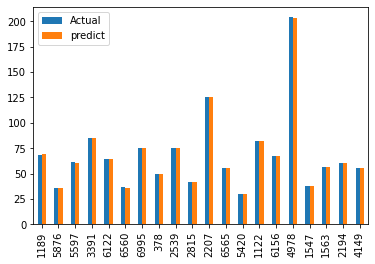

In [ ]:
graph.plot(kind='bar')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predicted)

In [ ]:
print(mse)

591.8534001696933


In [ ]:
rmse=np.sqrt(mse)

In [ ]:
print(rmse)

24.328037326707907
